In [1]:
#Ensembling Technique : - 
#Bootstraping 
#RandomForestTree
#Work on dataset bank.csv
#classification algorithm 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset bank.csv
df=pd.read_csv("bank.csv")
#to display first 5 records
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

In [3]:
#To check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [5]:
#check duplicates row
df.duplicated().sum()

0

In [ ]:
#here target variable : deposit that means we predict whether the customer 
#will subscribe the term deposit or not

In [6]:
#how many category in deposit column
df['deposit'].unique()

array([1, 0], dtype=int64)

In [7]:
#how many samples for 1 and 0 in target column deposit 
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

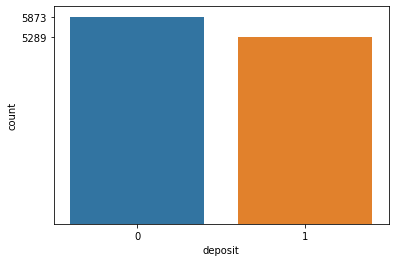

In [9]:
#visualise form
sns.countplot(data=df,x='deposit')
f=df['deposit'].value_counts()
plt.yticks(f)
plt.show()

In [10]:
#select input and output from given dataset
X=df.drop('deposit',axis=1) #select input
Y=df['deposit'] #output 

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                              random_state=1)

In [13]:
X_train.shape,Y_train.shape

((7813, 16), (7813,))

In [14]:
X_test.shape,Y_test.shape

((3349, 16), (3349,))

In [15]:
#Apply scaling on inputs X_train and X_test
from sklearn.preprocessing import StandardScaler
#create object of  StandardScaler class
ss= StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [17]:
#create user defined function
def create_model(model):
    model.fit(X_train,Y_train) #train the model with 70% data
    Y_pred=model.predict(X_test) #model test with 30% data
    #generate Report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#first use LogisticRegression Algo. 

In [ ]:
#second use DecisionTreeClassifier with GINI Index

In [ ]:
#Apply pruning Technique

In [ ]:
#Next  use DecisionTreeClassifier with Entropy

In [ ]:
#Apply pruning Technique with entropy

In [19]:
#Apply Random Forest Tree : It is Bootstraping Ensembling Technique 
#It is work with Bagging classifier BootStraping Ensembling Tech .
#In RandomForestTree : Train the dataset on multiple DecisionTree Algorithm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#ensemble means to train given dataset on multiple Algorithm

In [ ]:
#create the object of RandomForestClassifier class
'''
for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print("No. of Decision Tree : ",i)
    #call function
    rfc=create_model(rfc)
'''  
#here n_estimators means take how many no. of decisiontree 
#n_estimators>=10 but n_estimators<=100

In [25]:
rfc=RandomForestClassifier(n_estimators=61,random_state=1)
#by default gini index
#call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.85      0.84      0.84      3349

[[1429  331]
 [ 196 1393]]


In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [30]:
dict={'Input':X.columns,'IG':rfc.feature_importances_}
#feature_importances_ inbuilt method of RandomForestClassifier class
#to show information gain of each input
#converts dict to dataframe
df1=pd.DataFrame(dict)
#soring

df1.sort_values('IG',ascending=False)

Input        IG
11   duration  0.361433
5     balance  0.088253
0         age  0.087126
10      month  0.083450
9         day  0.071436
13      pdays  0.051406
1         job  0.039788
8     contact  0.038709
15   poutcome  0.038642
6     housing  0.033713
12   campaign  0.033217
3   education  0.022186
14   previous  0.019489
2     marital  0.019488
7        loan  0.010276
4     default  0.001388

In [34]:
#Apply Pruning tech max_depth

'''for i in range(1,9):
    rfc1=RandomForestClassifier(n_estimators=61,random_state=1,max_depth=i)
    #by default gini index
    #call function
    print("Max Depth : ",i)
    rfc1=create_model(rfc1)'''

'for i in range(1,9):\n    rfc1=RandomForestClassifier(n_estimators=61,random_state=1,max_depth=i)\n    #by default gini index\n    #call function\n    print("Max Depth : ",i)\n    rfc1=create_model(rfc1)'

In [35]:
rfc1=RandomForestClassifier(n_estimators=61,random_state=1,max_depth=8)
#by default gini index
#call function
print("Max Depth : ",i)
rfc1=create_model(rfc1)

Max Depth :  8
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1760
           1       0.80      0.85      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1428  332]
 [ 232 1357]]


In [36]:
dict={'Input':X.columns,'IG':rfc1.feature_importances_}

df1=pd.DataFrame(dict)
#soring

df1.sort_values('IG',ascending=False)

Input        IG
11   duration  0.483505
13      pdays  0.069499
15   poutcome  0.069024
10      month  0.065383
8     contact  0.063512
0         age  0.052272
6     housing  0.049891
5     balance  0.041654
14   previous  0.026522
9         day  0.024869
12   campaign  0.014794
1         job  0.013857
2     marital  0.010334
3   education  0.007755
7        loan  0.006509
4     default  0.000619